In [29]:
#=========================================================
#            MACAV2METDATA FILE PARAMETERS
#=========================================================
dirPath='http://thredds.northwestknowledge.net:8080/thredds/dodsC/' 
 
#=========================================================
#            MACA TARGET DATA
#=========================================================
lat_target=42
lon_target=-76.501884

In [5]:
lon_target=360-117.0
from netCDF4 import Dataset
#--------------------------------------------------------
#  FILENAME
#--------------------------------------------------------
fileName='agg_macav1metdata_huss_BNU-ESM_r1i1p1_historical_1950_2005_WUSA.nc'
#--------------------------------------------------------
#   FORM FILENAME AND GET HANDLE TO FILE AND DATA
#--------------------------------------------------------
fullfilename= "http://thredds.northwestknowledge.net:8080/thredds/dodsC/macav1metdata_dps_BNU-ESM_r1i1p1_historical_1950_2005_WUSA_monthly_aggregated.nc.html"
print (fullfilename)
#=========================================================
#             GET DATA HANDLES
#=========================================================
filehandle=Dataset(fullfilename)
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
timehandle=filehandle.variables['time']
datahandle=filehandle.variables['specific_humidity']
#for v in datahandle.variables: 
#    print(v)

http://thredds.northwestknowledge.net:8080/thredds/dodsC/macav1metdata_dps_BNU-ESM_r1i1p1_historical_1950_2005_WUSA_monthly_aggregated.nc.html


OSError: [Errno -68] NetCDF: I/O failure: b'http://thredds.northwestknowledge.net:8080/thredds/dodsC/macav1metdata_dps_BNU-ESM_r1i1p1_historical_1950_2005_WUSA_monthly_aggregated.nc.html'

In [19]:
url = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_was_BNU-ESM_r1i1p1_rcp85_2096_2099_CONUS_monthly.nc'
dataset = Dataset(url)

OSError: [Errno -68] NetCDF: I/O failure: b'http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_was_BNU-ESM_r1i1p1_rcp85_2096_2099_CONUS_monthly.nc'

In [20]:
testData = Dataset("./web_app/datasets/test_data.nc", "r", format="NETCDF4")


In [24]:
print(testData.data_model)
print(testData)

NETCDF3_CLASSIC
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.0
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.0631
    geospatial_lat_max: 49.3960
    geospatial_lon_min: -124.7722
    geospatial_lon_max: -67.0648
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 02 July 2019
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Development of gridded surf

In [26]:
lon_target=360-117.0
from netCDF4 import Dataset
#--------------------------------------------------------
#  FILENAME
#--------------------------------------------------------
fileName='./web_app/datasets/test_data.nc'
#--------------------------------------------------------
#   FORM FILENAME AND GET HANDLE TO FILE AND DATA
#--------------------------------------------------------
fullfilename= "./web_app/datasets/test_data.nc"
print (fullfilename)
#=========================================================
#             GET DATA HANDLES
#=========================================================
filehandle=Dataset(fullfilename)
lathandle=filehandle.variables['lat']
lonhandle=filehandle.variables['lon']
timehandle=filehandle.variables['day']
datahandle=filehandle.variables['precipitation_amount']

print(filehandle)

./web_app/datasets/test_data.nc
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.0
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.0631
    geospatial_lat_max: 49.3960
    geospatial_lon_min: -124.7722
    geospatial_lon_max: -67.0648
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 02 July 2019
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Development

In [31]:
import numpy as np
import matplotlib.pyplot as plt
day = 1
#=========================================================
#             GET DATA 
#=========================================================
#get data
time_num=len(timehandle)
timeindex=range(day-1,time_num,365)  #python starts arrays at 0
time=timehandle[timeindex]
lat = lathandle[:]
lon = lonhandle[:]
#=========================================================
#find indices of target lat/lon/day
lat_index =  np.searchsorted(lat,lat_target,side='left')
lon_index =  np.searchsorted(lon,lon_target,side='left')
#check final is in right bounds
if(lat[lat_index]>lat_target):
	if(lat_index!=0):
		lat_index = lat_index - 1
if(lat[lat_index]<lat_target):
	if(lat_index!=len(lat)):
		lat_index =lat_index +1
if(lon[lon_index]>lon_target):
	if(lon_index!=0):
		lon_index = lon_index - 1
if(lon[lon_index]<lon_target):
	if(lon_index!=len(lon)):
		lon_index = lon_index + 1
lat=lat[lat_index]
lon=lon[lon_index]
#=========================================================
#get data
data = datahandle[timeindex,lat_index,lon_index]
print(data)

[0.8 0.5]


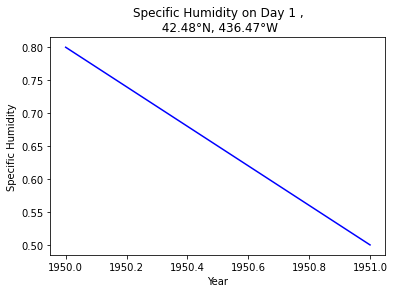

In [32]:
yearref=1950
years = np.arange(yearref,yearref+len(time))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(u'Year')
ax.set_ylabel(u'Specific Humidity')
ax.set_title(u'Specific Humidity on Day %d ,\n %4.2f\u00b0N, %4.2f\u00b0W' % (day,lat, abs(360-lon)))
#ax.plot_date(x=time,y=data,fmt="b-")
ax.ticklabel_format(style='plain')
ax.plot(years,data,'b-')
plt.savefig("myPythonGraph.png")
plt.show()